In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Import Necessary Libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
print("Libraries imported successfully!")


Libraries imported successfully!


**Define Dataset Paths**



In [ ]:
# Define the base path to the dataset
base_path = '/content/drive/MyDrive/lumpy_skin_dataset/archive'

# Define paths to infected and normal folders
infected_path = os.path.join(base_path, 'infected')
normal_path = os.path.join(base_path, 'normal')

print(f"Infected Path: {infected_path}")
print(f"Normal Path: {normal_path}")


Infected Path: /content/drive/MyDrive/lumpy_skin_dataset/archive/infected
Normal Path: /content/drive/MyDrive/lumpy_skin_dataset/archive/normal


 navigate to the dataset folder and list its contents:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/


'AEC CLASS 1(C++)_copy.pdf'   'Document from Pranamya'		 lumpy_skin_dataset
'atc notes.pdf'		      'Document from Pranamya (1)'	'mod 3 oops.gdoc'
'cattle guard.gdoc'	      'Document from Pranamya (1).pdf'	'Module 00.gdoc'
'Colab Notebooks'	      'Document from Pranamya.gdoc'	'os exam.gdoc'
'computer organisation.gdoc'  'Document from Pranamya.pdf'	 pranamya.certificates2.pdf
'Copy of Report.gdoc'	      'GIT 2.gdoc'			'Report (1).gdoc'
'Dice web.gsheet'	      'Grade book.gsheet'		 Report.gdoc


In [ ]:
!ls /content/drive/MyDrive/lumpy_skin_dataset/


'archive (1)'


In [ ]:
# List the contents of the 'archive (1)' folder
!ls /content/drive/MyDrive/lumpy_skin_dataset/archive\ \(1\)/

# Check the contents of the 'infected' and 'normal' folders
!ls /content/drive/MyDrive/lumpy_skin_dataset/archive\ \(1\)/infected/
!ls /content/drive/MyDrive/lumpy_skin_dataset/archive\ \(1\)/normal/


infected  normal
infected
normal


In [ ]:
# Define the dataset paths for infected and normal folders
infected_path = '/content/drive/MyDrive/lumpy_skin_dataset/archive (1)/infected/infected/'
normal_path = '/content/drive/MyDrive/lumpy_skin_dataset/archive (1)/normal/normal/'

# Verify the contents of both folders
import os
print("Infected images count:", len(os.listdir(infected_path)))
print("Normal images count:", len(os.listdir(normal_path)))


Infected images count: 2000
Normal images count: 2000


**Load and Preprocess the Data**


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Function to load and preprocess the data
def load_data(infected_path, normal_path, image_size=(128, 128)):
    images = []
    labels = []

    # Load infected images
    for img_name in os.listdir(infected_path):
        img_path = os.path.join(infected_path, img_name)
        img = cv2.imread(img_path)  # Read the image
        img = cv2.resize(img, image_size)  # Resize the image to fixed size
        img = img / 255.0  # Normalize the image
        images.append(img)
        labels.append(1)  # Label as infected (1)

    # Load normal images
    for img_name in os.listdir(normal_path):
        img_path = os.path.join(normal_path, img_name)
        img = cv2.imread(img_path)  # Read the image
        img = cv2.resize(img, image_size)  # Resize the image to fixed size
        img = img / 255.0  # Normalize the image
        images.append(img)
        labels.append(0)  # Label as normal (0)

    return np.array(images), np.array(labels)

# Load the data
images, labels = load_data(infected_path, normal_path)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# One-hot encode the labels (optional)
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

print("Data loaded and preprocessed.")
print(f"Training data size: {X_train.shape}")
print(f"Test data size: {X_test.shape}")


Data loaded and preprocessed.
Training data size: (3200, 128, 128, 3)
Test data size: (800, 128, 128, 3)


# Building the CNN Model

**Import Required Libraries**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


**Define the CNN Model Architecture**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Adjusted for binary classification
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile the Model**


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


**Train the Model**


In [ ]:
try:
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
except NameError:
    print("Variables not defined. Re-run preprocessing steps.")


X_train shape: (3200, 128, 128, 3)
y_train shape: (3200, 2)


In [ ]:
# Fix the labels to be binary (0 or 1) instead of one-hot encoded
y_train = np.argmax(y_train, axis=1) if len(y_train.shape) > 1 else y_train
y_test = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test

# Check the shapes and unique values to confirm
print(f"y_train shape: {y_train.shape}, unique values: {np.unique(y_train)}")
print(f"y_test shape: {y_test.shape}, unique values: {np.unique(y_test)}")


y_train shape: (3200,), unique values: [0 1]
y_test shape: (800,), unique values: [0 1]


In [ ]:
history = model.fit(
    X_train, y_train,  # Training data and labels
    validation_data=(X_test, y_test),  # Validation data and labels
    epochs=10,  # Adjust if needed
    batch_size=32
)


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.8385 - loss: 0.3933 - val_accuracy: 0.9875 - val_loss: 0.0581
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9841 - loss: 0.0476 - val_accuracy: 0.9712 - val_loss: 0.0953
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9837 - loss: 0.0382 - val_accuracy: 0.9825 - val_loss: 0.0498
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9949 - loss: 0.0195 - val_accuracy: 0.9800 - val_loss: 0.0770
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9958 - loss: 0.0152 - val_accuracy: 0.9812 - val_loss: 0.0765
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9931 - loss: 0.0178 - val_accuracy: 0.9725 - val_loss: 0.0948
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9989 - loss: 0.0037 - val_accuracy: 0.9787 - val_loss: 0.0828
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accu

**testing**

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9748 - loss: 0.1313
Test Accuracy: 97.75%
Test Loss: 0.1072


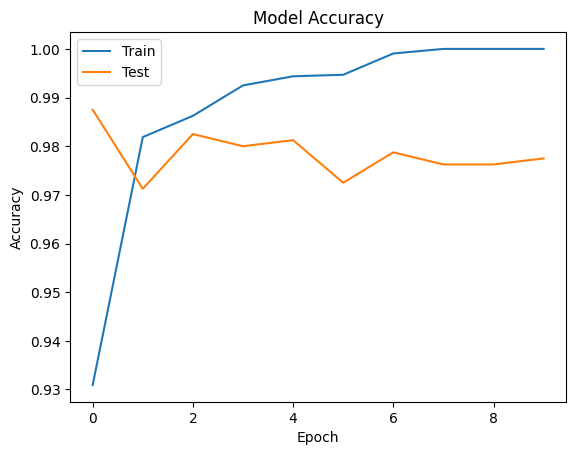

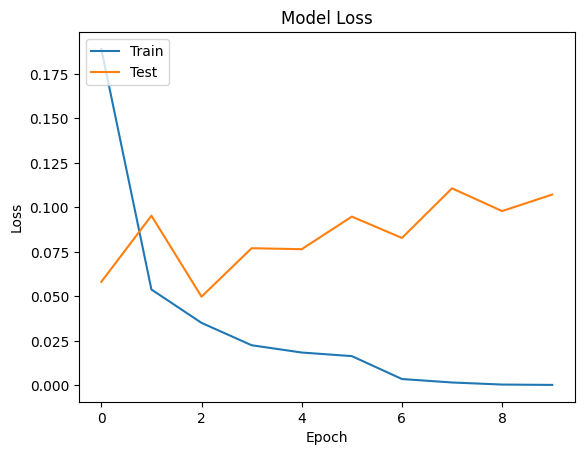

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


**Model Evaluation**

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy and loss
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9748 - loss: 0.1313
Test Accuracy: 97.75%
Test Loss: 0.1072


**Save Model**

In [ ]:
# Save the model to a file
model.save('my_model.h5')

print("Model saved successfully.")


Model saved successfully.


In [ ]:
# Save the model in the newer .keras format
model.save('my_model.keras')

print("Model saved successfully in the .keras format.")


Model saved successfully in the .keras format.


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('my_model.keras')  # or 'my_model.h5'

print("Model loaded successfully.")


Model loaded successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9748 - loss: 0.1313
Test Accuracy: 97.75%
Test Loss: 0.1072


In [ ]:
predictions = model.predict(X_test)
print(predictions[:5])  # Print first 5 predictions


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[[1.0000000e+00]
 [3.2908900e-04]
 [1.0000000e+00]
 [2.6645732e-14]
 [5.4882149e-10]]


In [ ]:
# Save the model as a .h5 file (you can change the filename if you prefer)
model.save('my_model.h5')


In [ ]:
model.save('my_model.keras')


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('my_model.keras')


In [ ]:
from google.colab import files
files.download('my_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>